# 3.Classifying Text

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
import nltk
from string import punctuation
from nltk import word_tokenize
import re
from matplotlib import pyplot as plt
from scipy.stats import kde
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics
import textblob
import requests
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
full_stop_words = nltk.corpus.stopwords.words('english') + list(punctuation)
punction = list(punctuation)

Compute some statistics on your data: Write a Python programme that will open the file and
count the number of lines that are labelled ham and the number of lines that are labelled
spam.

In [3]:
data_set = pd.read_csv('SMSSpamCollection.csv',encoding='latin-1',header=None,names=['label','content'])
num_ham = data_set['label'][data_set['label']=='ham'].count()
num_spam = data_set['label'][data_set['label']=='spam'].count()
print('num_ham',num_ham)
print('num_spam',num_spam)

num_ham 4825
num_spam 747


Create balanced training and test sets

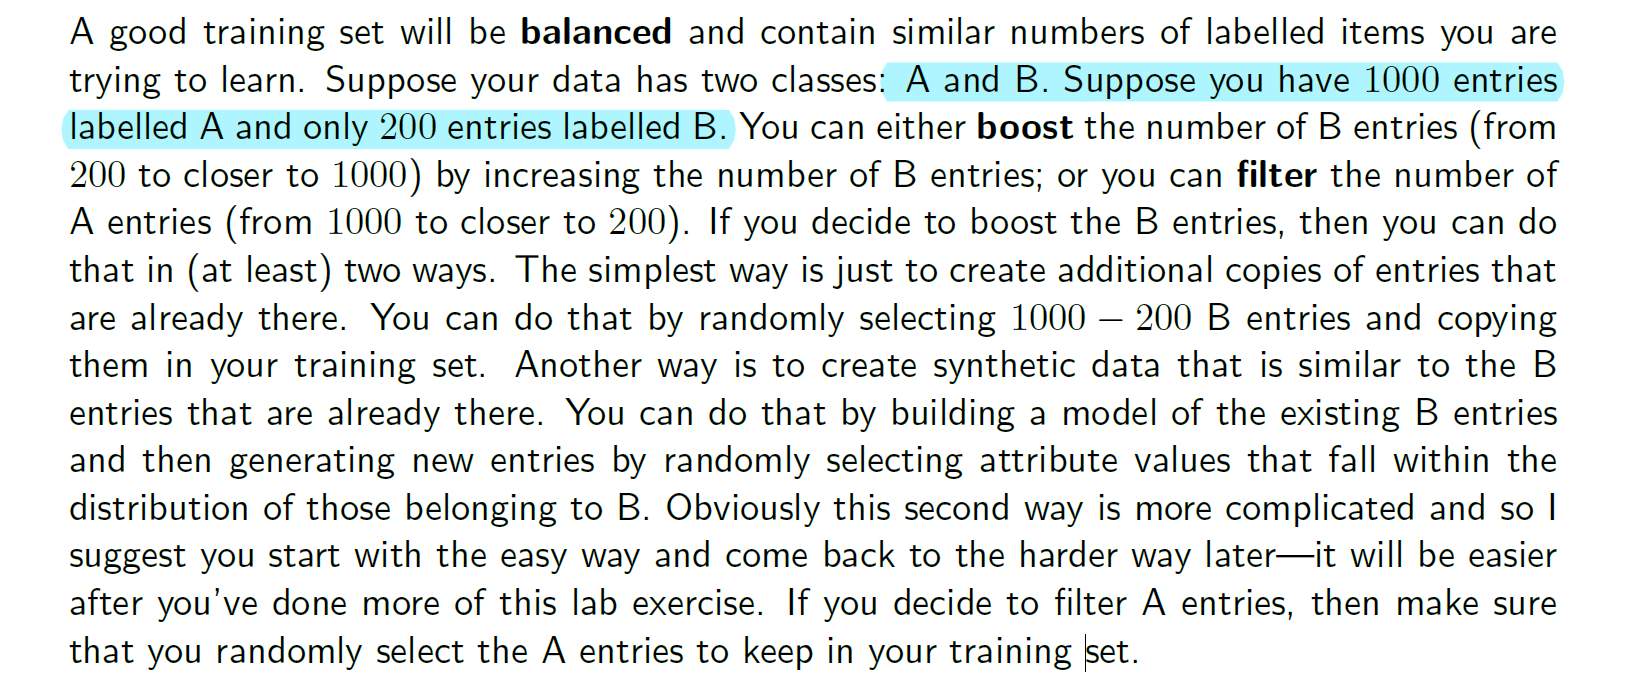

In [4]:
spam_df = data_set[data_set['label']=='spam']
ham_df = data_set[data_set['label']=='ham']
additional_spam_df = spam_df.sample(n=num_ham-num_spam,random_state=1,replace=True).reset_index(drop=True)
balanced_df = data_set.append(additional_spam_df).reset_index(drop=True)

C:\Users\53584\AppData\Local\Temp/ipykernel_12728/2037601696.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_df = data_set.append(additional_spam_df).reset_index(drop=True)


In [5]:
balanced_spam = balanced_df[balanced_df['label']=='spam']
balanced_ham = balanced_df[balanced_df['label']=='ham']

In [6]:
test_size = 0.10
balanced_train, balanced_test ,balanced_label_train, balanced_label_test = model_selection.train_test_split(balanced_df['content'],
                                                            balanced_df['label'],
                                                           test_size=test_size)


Characterise the training data set: We need to figure out how to characterise records that are
spam versus not spam (\ham"). Let's start by computing a set of attribute values for both
types of entries in your training data set. Here's a set of attributes to start with:

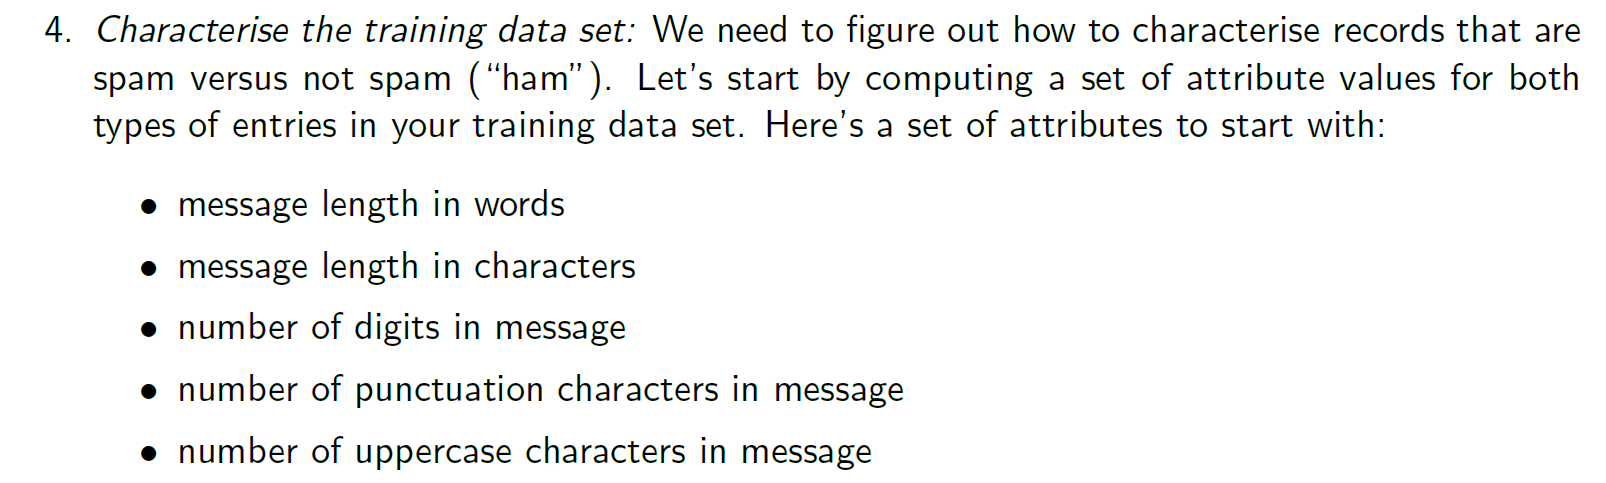

In [7]:
preprocessing_message =pd.DataFrame(balanced_train).apply(lambda x: word_tokenize(str(x['content'])),axis=1)
message_length_in_words = pd.DataFrame(preprocessing_message).apply(lambda x :len(x[0]),axis=1)
message_length_in_character = pd.DataFrame(pd.DataFrame(preprocessing_message).apply(lambda x: "".join(x[0]),axis=1)).apply(lambda x: len(x[0]),axis=1)
number_of_digits_in_message = pd.DataFrame(preprocessing_message).apply(lambda x: len(re.findall('[0-9]', ''.join(list(x[0])))),axis=1)
number_of_punctuation_characters_in_message = pd.DataFrame(pd.DataFrame(preprocessing_message).apply(lambda x: [character for character in x[0] if character in punction],axis=1)).apply(lambda x: len(x[0]),axis=1)
number_of_uppercase_characters_in_message = pd.DataFrame(preprocessing_message).apply(lambda x: len(re.findall('[A-Z]'," ".join(x[0]))),axis=1)

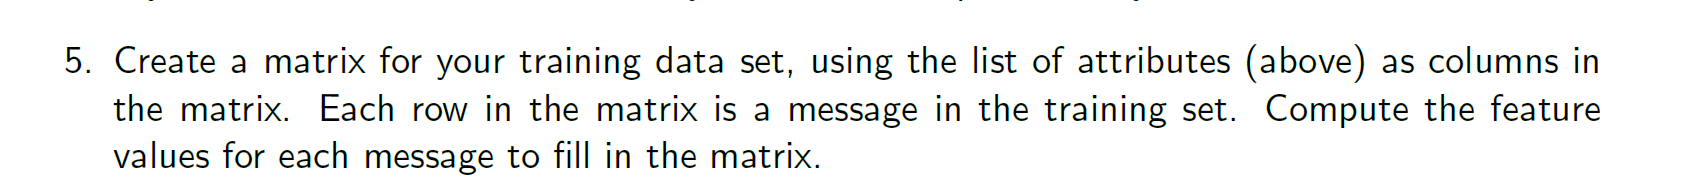

In [8]:
data_dict={}
data_dict['length_in_words'] = message_length_in_words
data_dict['length_in_character'] = message_length_in_character
data_dict['number_of_digits'] = number_of_digits_in_message
data_dict['punctuation'] = number_of_punctuation_characters_in_message
data_dict['uppercase_characters'] = number_of_uppercase_characters_in_message
data_dict['label'] = balanced_label_train
train_x = pd.DataFrame(data_dict)
train_x
# balanced_label_train

,length_in_words,length_in_character,number_of_digits,punctuation,uppercase_characters,label
840,31,135,25,3,16,spam
9126,36,136,21,10,6,spam
4159,11,64,0,0,1,ham
1986,34,95,1,4,4,ham
934,18,62,0,1,3,ham
...,...,...,...,...,...,...
4399,76,339,0,6,8,ham
154,31,135,1,5,10,ham
5549,25,70,0,7,4,ham
2687,26,73,0,5,1,ham


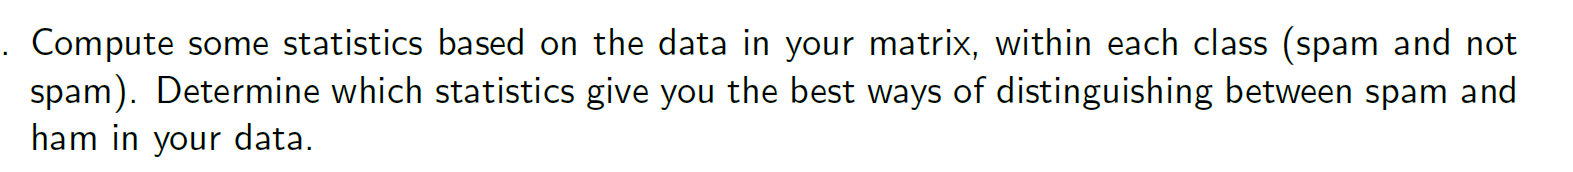

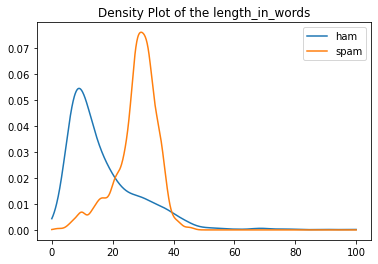

In [9]:
fig = plt.figure()
density = kde.gaussian_kde(train_x[train_x['label']=='ham']['length_in_words'])
density_=density(train_x[train_x['label']=='ham']['length_in_words'])
x = np.linspace(0,100,1000)
y=density(x)
plt.plot(x, y)

density_2 = kde.gaussian_kde(train_x[train_x['label']=='spam']['length_in_words'])
density_2_=density(train_x[train_x['label']=='spam']['length_in_words'])
y2=density_2(x)
plt.plot(x, y2)

plt.legend(['ham','spam'])

plt.title("Density Plot of the length_in_words")
plt.show()

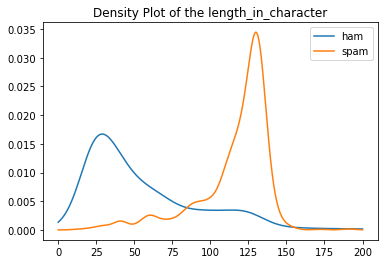

In [10]:
fig = plt.figure()
density = kde.gaussian_kde(train_x[train_x['label']=='ham']['length_in_character'])
density_=density(train_x[train_x['label']=='ham']['length_in_character'])
x = np.linspace(0,200,1000)
y=density(x)
plt.plot(x, y)

density_2 = kde.gaussian_kde(train_x[train_x['label']=='spam']['length_in_character'])
density_2_=density(train_x[train_x['label']=='spam']['length_in_character'])
y2=density_2(x)
plt.plot(x, y2)

plt.legend(['ham','spam'])

plt.title("Density Plot of the length_in_character")
plt.show()

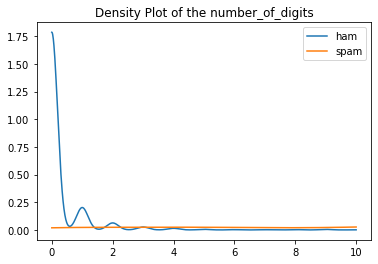

In [11]:
fig = plt.figure()
density = kde.gaussian_kde(train_x[train_x['label']=='ham']['number_of_digits'])
density_=density(train_x[train_x['label']=='ham']['number_of_digits'])
x = np.linspace(0,10,1000)
y=density(x)
plt.plot(x, y)

density_2 = kde.gaussian_kde(train_x[train_x['label']=='spam']['number_of_digits'])
density_2_=density(train_x[train_x['label']=='spam']['number_of_digits'])
y2=density_2(x)
plt.plot(x, y2)

plt.legend(['ham','spam'])

plt.title("Density Plot of the number_of_digits")
plt.show()

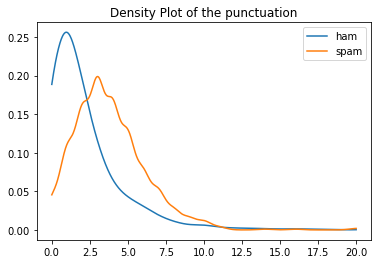

In [12]:
fig = plt.figure()
density = kde.gaussian_kde(train_x[train_x['label']=='ham']['punctuation'])
density_=density(train_x[train_x['label']=='ham']['punctuation'])
x = np.linspace(0,20,1000)
y=density(x)
plt.plot(x, y)

density_2 = kde.gaussian_kde(train_x[train_x['label']=='spam']['punctuation'])
density_2_=density(train_x[train_x['label']=='spam']['punctuation'])
y2=density_2(x)
plt.plot(x, y2)

plt.legend(['ham','spam'])

plt.title("Density Plot of the punctuation")
plt.show()

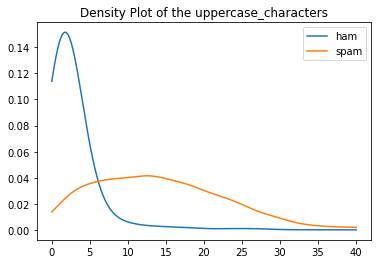

In [13]:
fig = plt.figure()
density = kde.gaussian_kde(train_x[train_x['label']=='ham']['uppercase_characters'])
density_=density(train_x[train_x['label']=='ham']['uppercase_characters'])
x = np.linspace(0,40,1000)
y=density(x)
plt.plot(x, y)

density_2 = kde.gaussian_kde(train_x[train_x['label']=='spam']['uppercase_characters'])
density_2_=density(train_x[train_x['label']=='spam']['uppercase_characters'])
y2=density_2(x)
plt.plot(x, y2)

plt.legend(['ham','spam'])

plt.title("Density Plot of the uppercase_characters")
plt.show()

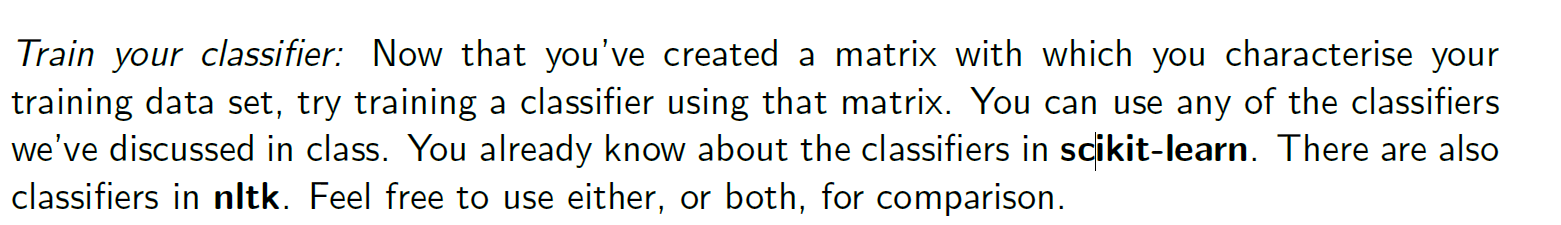

# using the multinomial Naive Bayes classifier

http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html


## feature selection
length_in_words<br>
length_in_character<br>
uppercase_characters<br>

In [14]:
clf = MultinomialNB()
# clf.fit(train_x.loc[:,['length_in_words','length_in_character','uppercase_characters']],np.array(train_x.loc[:,['label']]).ravel())
clf.fit(train_x.loc[:,['length_in_words','length_in_character','number_of_digits','punctuation','uppercase_characters']],np.array(train_x.loc[:,['label']]).ravel())

MultinomialNB()

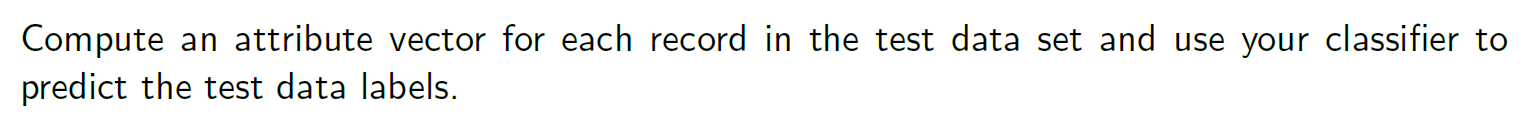

In [15]:
preprocessing_test =pd.DataFrame(balanced_test).apply(lambda x: word_tokenize(str(x['content'])),axis=1)
message_length_in_words = pd.DataFrame(preprocessing_test).apply(lambda x :len(x[0]),axis=1)
message_length_in_character = pd.DataFrame(pd.DataFrame(preprocessing_test).apply(lambda x: "".join(x[0]),axis=1)).apply(lambda x: len(x[0]),axis=1)
number_of_digits_in_message = pd.DataFrame(preprocessing_test).apply(lambda x: len(re.findall('[0-9]', ''.join(list(x[0])))),axis=1)
number_of_punctuation_characters_in_message = pd.DataFrame(pd.DataFrame(preprocessing_test).apply(lambda x: [character for character in x[0] if character in punction],axis=1)).apply(lambda x: len(x[0]),axis=1)
number_of_uppercase_characters_in_message = pd.DataFrame(preprocessing_test).apply(lambda x: len(re.findall('[A-Z]'," ".join(x[0]))),axis=1)

In [16]:
test_dict={}
test_dict['length_in_words'] = message_length_in_words
test_dict['length_in_character'] = message_length_in_character
test_dict['number_of_digits'] = number_of_digits_in_message
test_dict['punctuation'] = number_of_punctuation_characters_in_message
test_dict['uppercase_characters'] = number_of_uppercase_characters_in_message
test_dict['label'] = balanced_label_test
test_x = pd.DataFrame(test_dict)
test_x
# balanced_label_train

,length_in_words,length_in_character,number_of_digits,punctuation,uppercase_characters,label
2185,14,39,0,0,2,ham
8023,33,132,9,4,17,spam
2388,5,19,0,0,1,ham
5459,32,97,0,7,2,ham
653,17,52,0,3,2,ham
...,...,...,...,...,...,...
6196,28,127,24,4,14,spam
5638,34,132,2,7,20,spam
269,12,39,0,3,3,ham
1475,35,112,0,5,6,ham


In [17]:
predicted_labels = clf.predict(test_x.loc[:,['length_in_words','length_in_character','number_of_digits','punctuation','uppercase_characters']])

In [18]:
cm = metrics.confusion_matrix(list(test_x['label']),predicted_labels)
cm
# 竖着看是actual，横着是predict
# 主对角线是预测正确

array([[467,  14],
       [ 50, 434]], dtype=int64)

In [19]:
precision_ = metrics.precision_score(list(test_x['label']),predicted_labels,average=None)
recall_ = metrics.recall_score(list(test_x['label']),predicted_labels,average=None)
f1_socre = metrics.f1_score(list(test_x['label']),predicted_labels,average=None)
print('precision',precision_)
print('recall_',recall_)
print('f1_score',f1_socre)

precision [0.9032882 0.96875  ]
recall_ [0.97089397 0.89669421]
f1_score [0.93587174 0.93133047]


In [20]:
# hand computed
precision = cm[0][0]/(cm[0][0]+cm[1][0])
recall = cm[0][0]/(cm[0][0]+cm[0][1])
F1 = 2*precision*recall/(precision+recall)
print('precision',precision)
print('recall',recall)
print('f1',F1)

precision 0.9032882011605415
recall 0.9708939708939709
f1 0.9358717434869739


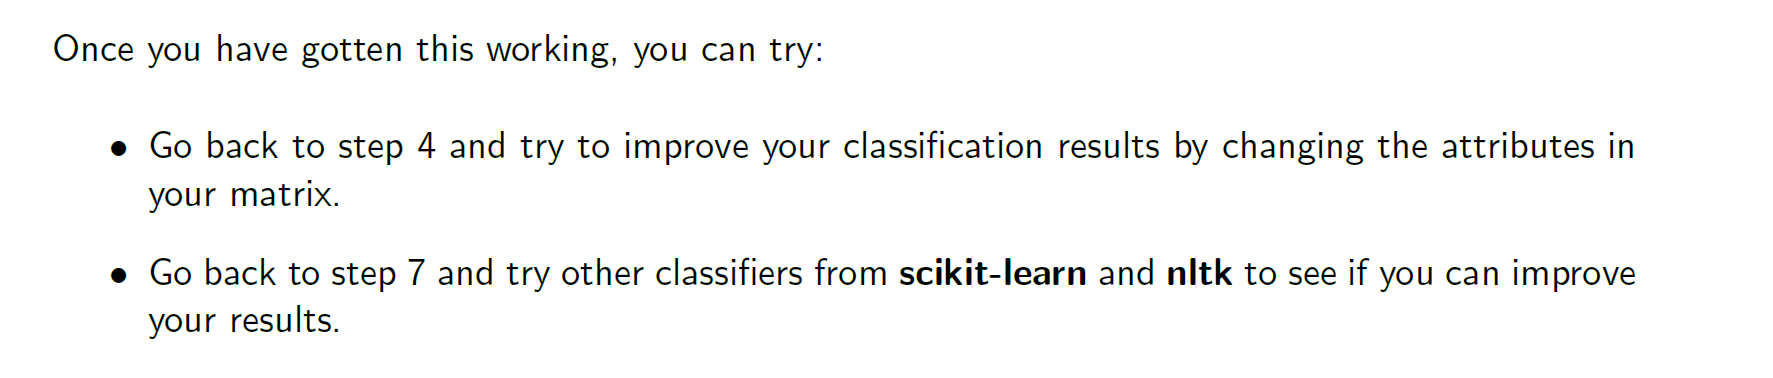

# 4 Clustering Text

In [21]:
# open data file containing verse
with open('el-owl-cat.txt') as f:
    raw_verse = f.read()
f.close()
# decode contents of text file and initialise a TextBlob object
verse = textblob.TextBlob(raw_verse)

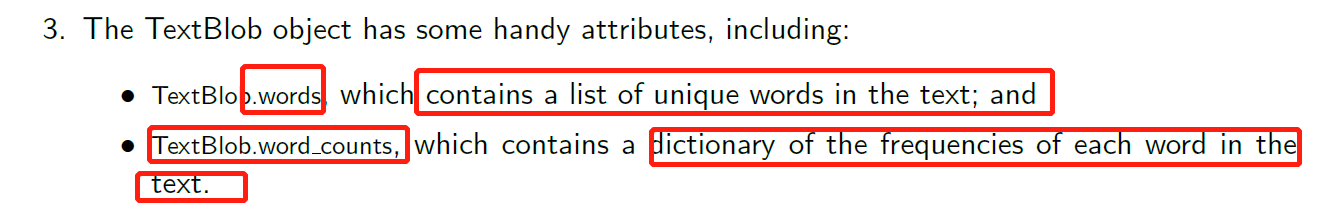

In [22]:
print(verse.words)
print(verse.word_counts)

['The', 'Owl', 'and', 'the', 'Pussy-Cat', 'went', 'to', 'sea', 'In', 'a', 'beautiful', 'pea-green', 'boat', 'They', 'took', 'some', 'honey', 'and', 'plenty', 'of', 'money', 'Wrapped', 'up', 'in', 'a', 'five-pound', 'note', 'The', 'Owl', 'looked', 'up', 'to', 'the', 'stars', 'above', 'And', 'sang', 'to', 'a', 'small', 'guitar', 'O', 'lovely', 'Pussy', 'O', 'Pussy', 'my', 'love', 'What', 'a', 'beautiful', 'Pussy', 'you', 'are', 'You', 'are', 'You', 'are', 'What', 'a', 'beautiful', 'Pussy', 'you', 'are', 'Pussy', 'said', 'to', 'the', 'Owl', 'You', 'elegant', 'fowl', 'How', 'charmingly', 'sweet', 'you', 'sing', 'O', 'let', 'us', 'be', 'married', 'too', 'long', 'we', 'have', 'tarried', 'But', 'what', 'shall', 'we', 'do', 'for', 'a', 'ring', 'They', 'sailed', 'away', 'for', 'a', 'year', 'and', 'a', 'day', 'To', 'the', 'land', 'where', 'the', 'Bong-tree', 'grows', 'And', 'there', 'in', 'a', 'wood', 'a', 'Piggy-wig', 'stood', 'With', 'a', 'ring', 'at', 'the', 'end', 'of', 'his', 'nose', 'His',

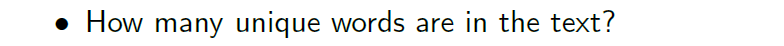

In [23]:
print(len(verse.words))

221


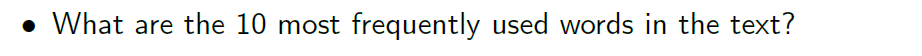

In [24]:
# key使用lambda匿名函数按键进行排序
ordered_dict = sorted(dict(verse.word_counts).items(),key = lambda x:x[1],reverse=True)
print(ordered_dict[:10])

[('the', 20), ('a', 13), ('and', 8), ('they', 7), ('of', 7), ('you', 7), ('to', 6), ('pussy', 5), ('are', 5), ('in', 4)]


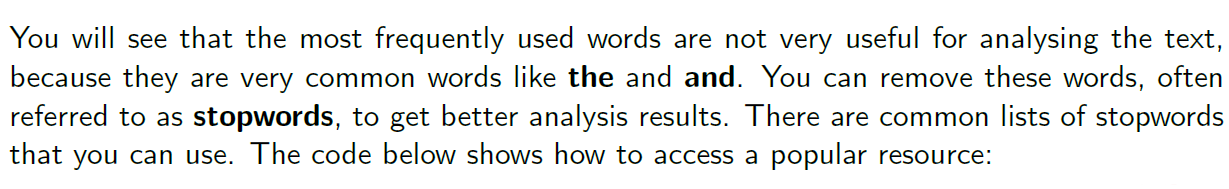

In [25]:
stopwords = requests.get('https://raw.githubusercontent.com/fozziethebeat/S-Space/master/data/english-stop-words-large.txt').content.decode('utf-8').split("\n")
words_after_ = [word.lower() for word in verse.words if word.lower() not in stopwords]
freq_after = nltk.FreqDist(words_after_)
freq_after

FreqDist({'pussy': 5, 'ring': 4, 'nose': 4, 'moon': 4, 'owl': 3, 'beautiful': 3, 'married': 2, 'day': 2, 'end': 2, 'hand': 2, ...})

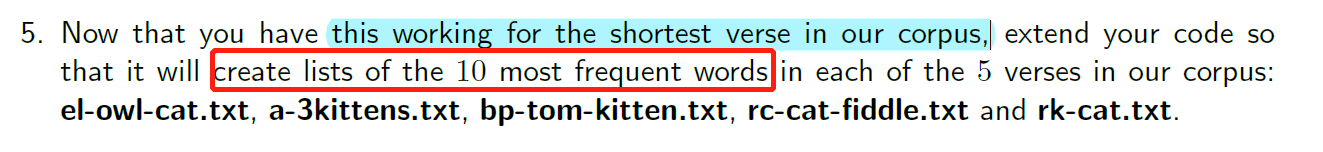

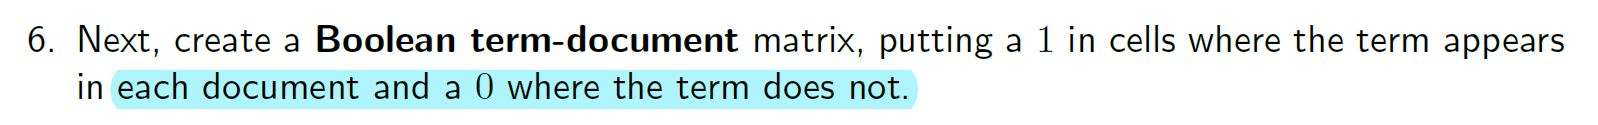

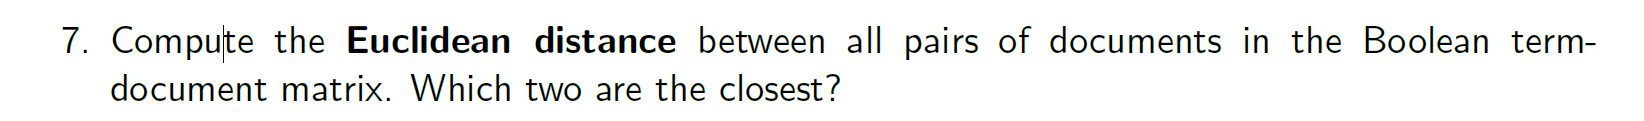

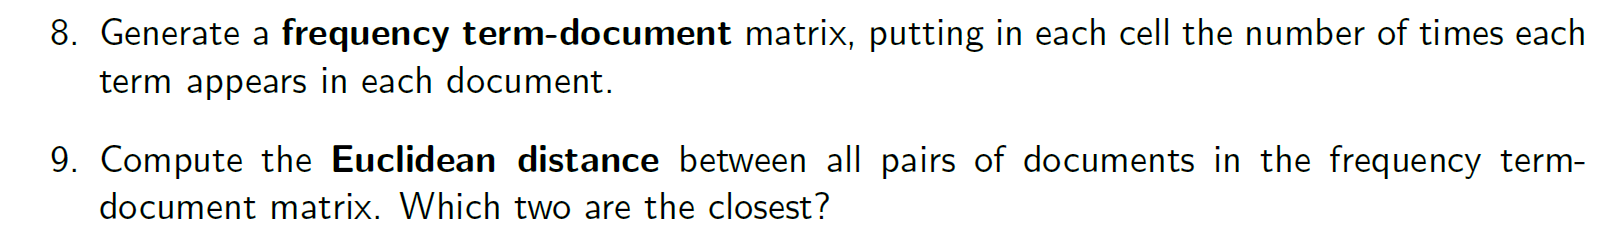

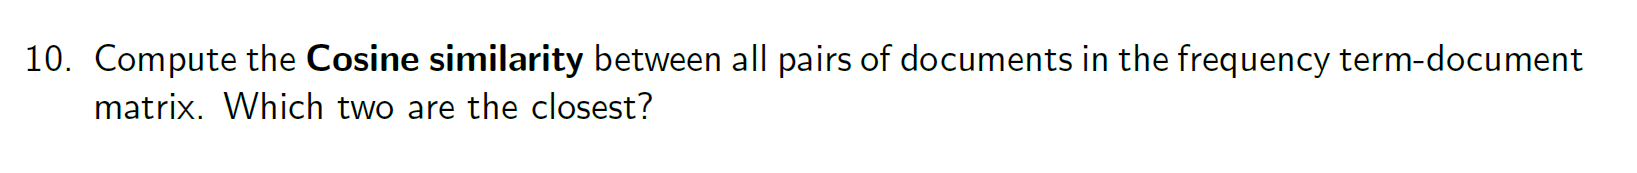

In [26]:
def cosine_similarity(x,y):
    num = x.T.dot(y)
    denom = np.linalg.norm(x) * np.linalg.norm(y)
    return num / denom

In [27]:
file_list = ['el-owl-cat.txt','a-3kittens.txt','bp-tom-kitten.txt','rc-cat-fiddle.txt','rk-cat.txt']
# content存内容
file_content = {}
# blob用来排序
text_blob = {}
for file_name in file_list:
    # open data file containing verse
    with open(file_name) as f:
        raw_verse = f.read()
    f.close()
    file_content[file_name] = raw_verse
# decode contents of text file and initialise a TextBlob object
    verse = textblob.TextBlob(raw_verse)
    text_blob[file_name] = verse

#为通过wrod_conts算出来的频率排序
ordered_blob = {}
for file_name in file_list:
    ordered_tmp = sorted(dict(text_blob[file_name].word_counts).items(),key = lambda x:x[1],reverse=True)
    ordered_blob[file_name] = ordered_tmp

# 去停用词
words_after_stopwords = {}
for file_name in file_list:
    tmp_words = text_blob[file_name].words
    tmp_after_ = [word.lower() for word in tmp_words if word.lower() not in stopwords]
    words_after_stopwords[file_name] = tmp_after_
    
# 去掉停用词后统计词频
freq_after = {}
for file_name in file_list:
    freq_after_tmp = nltk.FreqDist(words_after_stopwords[file_name])
    freq_after[file_name] = freq_after_tmp

# create term-document
transform_words_after_stopwords =[]
for file_name in file_list:
    transform_words_after_stopwords.append(" ".join(words_after_stopwords[file_name]))
vec = CountVectorizer()
X = vec.fit_transform(transform_words_after_stopwords)
term_document = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
term_document

# 在term document中把所有大于0的变为1 
boolean_term_document = term_document.copy(deep=True)
boolean_term_document[boolean_term_document>0] =1
boolean_term_document

# 在Boolean term document 计算欧氏距离
Boolean_euclidean_distance={}
for i in range(boolean_term_document.shape[0]):
    for j in range(i,boolean_term_document.shape[0]):
        if i != j:
            Boolean_euclidean_distance[(i,j)] = np.sqrt(np.sum(np.square(boolean_term_document.iloc[i]-boolean_term_document.iloc[j])))
boolean_sorted_euclidean_distance = sorted(Boolean_euclidean_distance.items(),key=lambda x: x[1])
print('obviously , {} and {} has minimum euclidean_distance {} in Boolean term document'.format(file_list[boolean_sorted_euclidean_distance[0][0][0]],file_list[boolean_sorted_euclidean_distance[0][0][1]],boolean_sorted_euclidean_distance[0][1]))


#  term document 计算欧氏距离
euclidean_distance={}
for i in range(term_document.shape[0]):
    for j in range(i,term_document.shape[0]):
        if i != j:
            euclidean_distance[(i,j)] = np.sqrt(np.sum(np.square(term_document.iloc[i]-term_document.iloc[j])))
sorted_euclidean_distance = sorted(euclidean_distance.items(),key=lambda x: x[1])
print('obviously , {} and {} has minimum euclidean_distance {} in frequency term document'.format(file_list[sorted_euclidean_distance[0][0][0]],file_list[sorted_euclidean_distance[0][0][1]],sorted_euclidean_distance[0][1]))

# compute cosine_similarity
cosine_similarity_result = {}
for i in range(term_document.shape[0]):
    for j in range(i,term_document.shape[0]):
        if i != j:
            a1 = np.array(term_document.iloc[i]).reshape(-1,1)
            a2 = np.array(term_document.iloc[j]).reshape(-1,1)
            tmp_cosine_similarity= cosine_similarity(a1,a2)
            cosine_similarity_result[(i,j)] = tmp_cosine_similarity
sorted_cosine_similarity = sorted(cosine_similarity_result.items(),key=lambda x: x[1],reverse=True)
print('obviously , {} and {} has maximum cosine_similarity {} in frequency term document'.format(file_list[sorted_cosine_similarity[0][0][0]],file_list[sorted_cosine_similarity[0][0][1]],sorted_cosine_similarity[0][1][0][0]))


obviously , el-owl-cat.txt and rc-cat-fiddle.txt has minimum euclidean_distance 8.426149773176359 in Boolean term document
obviously , el-owl-cat.txt and rc-cat-fiddle.txt has minimum euclidean_distance 13.601470508735444 in frequency term document
obviously , rc-cat-fiddle.txt and rk-cat.txt has maximum cosine_similarity 0.1836266651605919 in frequency term document
